# __Exploratory Data Analysis__

## _Data Cleaning and Preprocessing:_
- Dataset contains 8 columns and 4340 rows.  
- No null values present.  
- Identified 790 duplicate entries, retained the first occurrence and removed the duplicates for data consistency.
- Applied One-Hot Encoding to 'fuel', 'seller_type', and 'transmission' for categorical representation.  
- Performed Label Encoding on 'brand' and 'owner' to convert them into numerical values.
- Created a new 'brand' column by extracting the first word from the 'name' column and dropped 'name' for better feature representation.
- Derived 'car_age' by subtracting the manufacturing year from 2024 and removed the 'year' column.
- Removed outliers from 'selling_price', 'km_driven', and 'car_age' using the Interquartile Range (IQR) method to improve model performance.
  
## _Data visualization:_
1. **Heatmap** – Visualized the correlation matrix to understand relationships.  
2. **Bar Plot (Brand Analysis)** – Analyzed the most common car brands in the dataset.  
3. **Pairplot** – Displayed pairwise relationships between features, categorized by fuel type, owner, transmission, and seller type to assess their impact.  
4. **Line Plot** – Examined trends in selling prices over the years.  
5. **Histogram** – Explored the overall distribution of selling prices.  
6. **Category-wise Bar Plots** – Analyzed the impact of categorical variables ('fuel', 'transmission', 'seller_type', 'owner', 'brand') and 'km_driven' on selling price.  
7. **Box Plot** – Compared selling prices across brands, fuel types, and transmission types while also identifying outliers in numerical values like selling price, km driven, and car age.

## _Correlation Analysis and Conclusions_ 
***Car Age vs Selling Price (0.42)***
- Older cars generally have lower selling prices due to depreciation.
    
***Transmission Type vs Selling Price (-0.49)***
- Manual cars show a strong negative correlation with selling price, indicating that **automatic cars** tend to be more expensive.  

***Fuel Type and Selling Price***
- **Diesel (0.28):** Positively correlated with selling price, meaning diesel cars are generally more expensive.  
- **Petrol (-0.26):** Negatively correlated, suggesting petrol cars are usually cheaper.  
- **Diesel vs Petrol (-0.97):** A strong inverse correlation, as a car can have only one fuel type.  

***Ownership History and Selling Price (-0.21)***
- The more owners a car has had, the lower its selling price.  
- **First-owner cars** tend to have significantly higher resale value.  

***Kilometers Driven and Selling Price (-0.19)***
- Higher mileage cars generally have lower selling prices, but the impact is not very strong.  

## _Recommendations for pricing strategy:_
- Newer, automatic, first-owner, and diesel cars tend to have higher resale value.
- Cars with more previous owners, higher mileage, and manual transmission tend to sell for less.
- Petrol cars generally have a lower selling price than diesel.

## _Performance of the regression model_
- The Linear Regression model achieved an R² score of 0.5341 and an RMSE of 176,793.69, indicating that while it captures the general trend of selling prices, its predictive accuracy is moderate.
-  The Actual vs. Predicted Selling Price scatter plot shows that the model performs well for lower-priced cars but struggles with higher-priced ones, as seen from deviations from the ideal regression line (red dashed line).
-  Further improvements can be made by feature engineering, polynomial transformations, or addressing multicollinearity among predictors.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [47]:
df=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

## Understanding the Dataset

In [48]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [49]:
df.shape

(4340, 8)

In [50]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [51]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [52]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [53]:
print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [54]:
df['brand'] = df['name'].str.split().str[0]
df = df.drop(columns=['name'])
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


# Encoding the data

In [55]:
Df = pd.get_dummies(df, columns=['fuel', 'seller_type','transmission' ], drop_first=True)

In [56]:
column_to_encode = ['brand','owner']
le = LabelEncoder()
for column in column_to_encode:
    Df[column] = le.fit_transform(Df[column])

In [57]:
Df.head()

,year,selling_price,km_driven,owner,brand,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,2007,60000,70000,0,18,False,False,False,True,True,False,True
1,2007,135000,50000,0,18,False,False,False,True,True,False,True
2,2012,600000,100000,0,10,True,False,False,False,True,False,True
3,2017,250000,46000,0,5,False,False,False,True,True,False,True
4,2014,450000,141000,2,9,True,False,False,False,True,False,True


In [58]:
Df.columns

Index(['year', 'selling_price', 'km_driven', 'owner', 'brand', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual'],
      dtype='object')

## Changing the datatypes to integer

In [59]:
Df = Df.astype('int64')
Df.dtypes

year                            int64
selling_price                   int64
km_driven                       int64
owner                           int64
brand                           int64
fuel_Diesel                     int64
fuel_Electric                   int64
fuel_LPG                        int64
fuel_Petrol                     int64
seller_type_Individual          int64
seller_type_Trustmark Dealer    int64
transmission_Manual             int64
dtype: object

## Dealing with null values and duplicates

In [60]:
Df.isnull().sum()

year                            0
selling_price                   0
km_driven                       0
owner                           0
brand                           0
fuel_Diesel                     0
fuel_Electric                   0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Manual             0
dtype: int64

### No Null Values

In [61]:
Df.duplicated().sum()

790

In [62]:
Df[Df.duplicated(keep=False)].head(10)


,year,selling_price,km_driven,owner,brand,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,2007,60000,70000,0,18,0,0,0,1,1,0,1
1,2007,135000,50000,0,18,0,0,0,1,1,0,1
2,2012,600000,100000,0,10,1,0,0,0,1,0,1
3,2017,250000,46000,0,5,0,0,0,1,1,0,1
4,2014,450000,141000,2,9,1,0,0,0,1,0,1
5,2007,140000,125000,0,18,0,0,0,1,1,0,1
6,2016,550000,25000,0,10,0,0,0,1,1,0,1
7,2014,240000,60000,2,25,0,0,0,1,1,0,1
8,2015,850000,25000,0,10,0,0,0,1,1,0,1
9,2017,365000,78000,0,18,0,0,0,0,1,0,1


In [63]:
Df.shape

(4340, 12)

In [64]:
Df = Df.drop_duplicates(keep='first')

### keeping the first record and deleting the other duplicates

In [65]:
Df.duplicated().sum()

0

In [66]:
Df.shape

(3550, 12)

## Car Brands

In [67]:
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [68]:
#Most common brands 
df['brand'].value_counts().head(10)

brand
Maruti        1280
Hyundai        821
Mahindra       365
Tata           361
Honda          252
Ford           238
Toyota         206
Chevrolet      188
Renault        146
Volkswagen     107
Name: count, dtype: int64

In [69]:
Df['car_age'] = 2024 - Df['year']
Df.drop(columns=['year'], inplace=True)


# Data Visualization

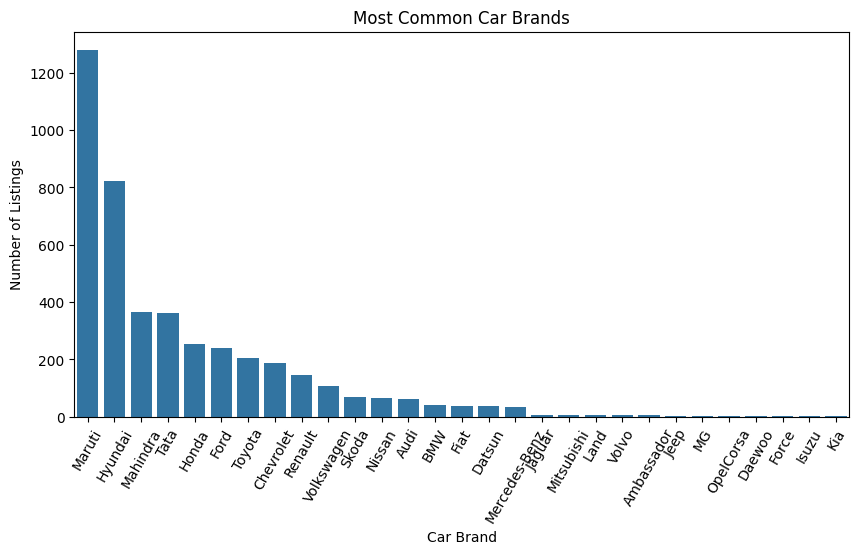

In [70]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['brand'].value_counts().index[:], y=df['brand'].value_counts().values[:])
plt.xticks(rotation=60)
plt.xlabel("Car Brand")
plt.ylabel("Number of Listings")
plt.title("Most Common Car Brands")
plt.show()

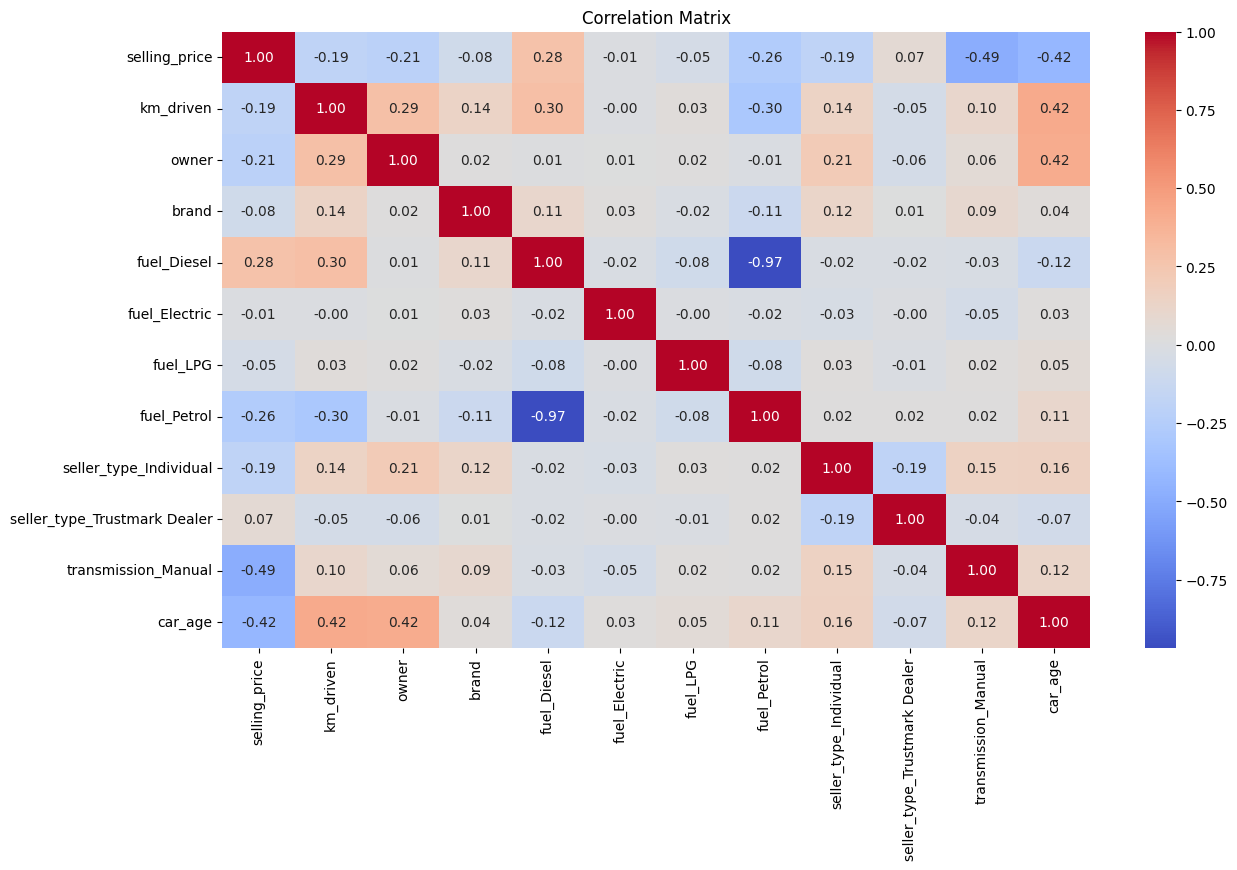

In [71]:
correlation_matrix =Df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm',annot=True,fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [72]:
correlation_with_price = Df.corr()["selling_price"]  # Replace with your target column
print(correlation_with_price.sort_values(ascending=False))


selling_price                   1.000000
fuel_Diesel                     0.276022
seller_type_Trustmark Dealer    0.065934
fuel_Electric                  -0.005410
fuel_LPG                       -0.046814
brand                          -0.076292
seller_type_Individual         -0.187272
km_driven                      -0.187840
owner                          -0.213459
fuel_Petrol                    -0.260490
car_age                        -0.424248
transmission_Manual            -0.486404
Name: selling_price, dtype: float64


Conclusions:- 

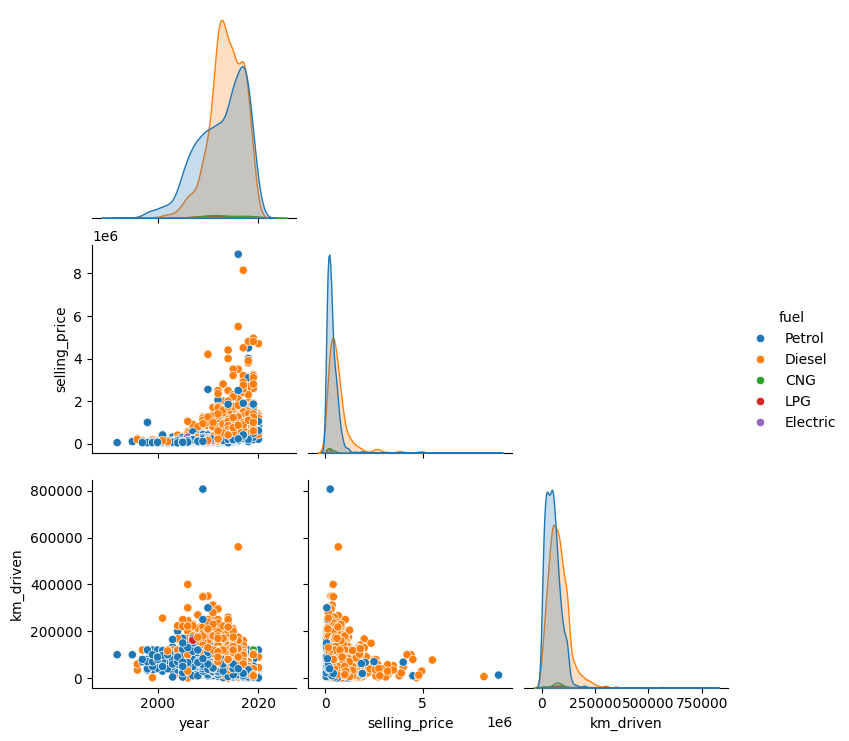

In [73]:
sns.pairplot(df, corner=True , hue = 'fuel')
plt.show()

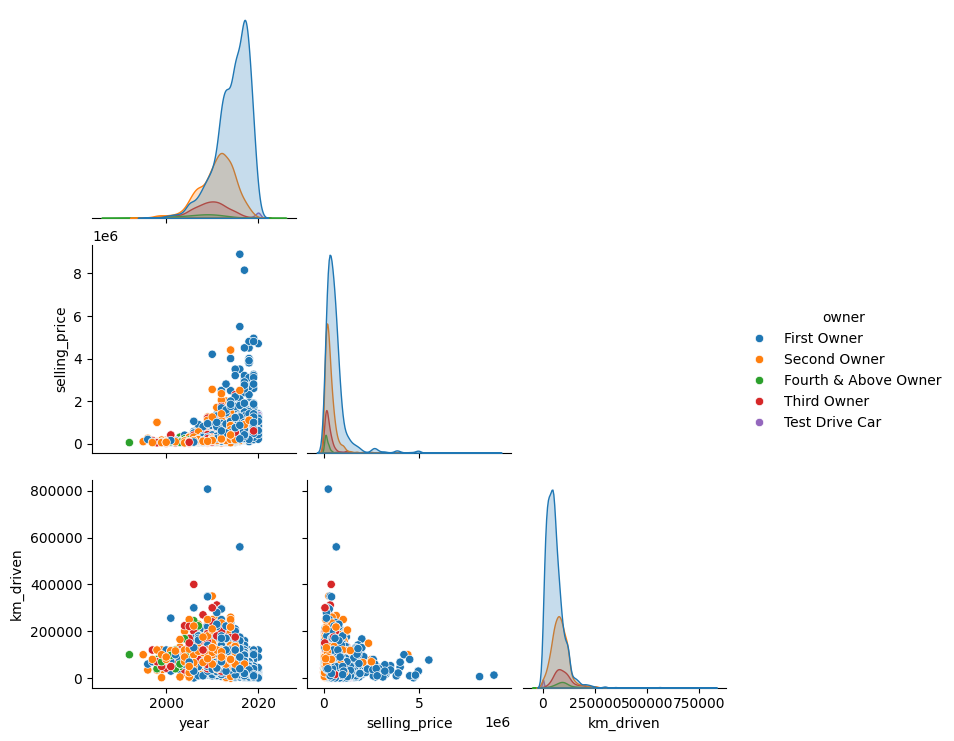

In [74]:
sns.pairplot(df, corner=True , hue = 'owner')
plt.show()

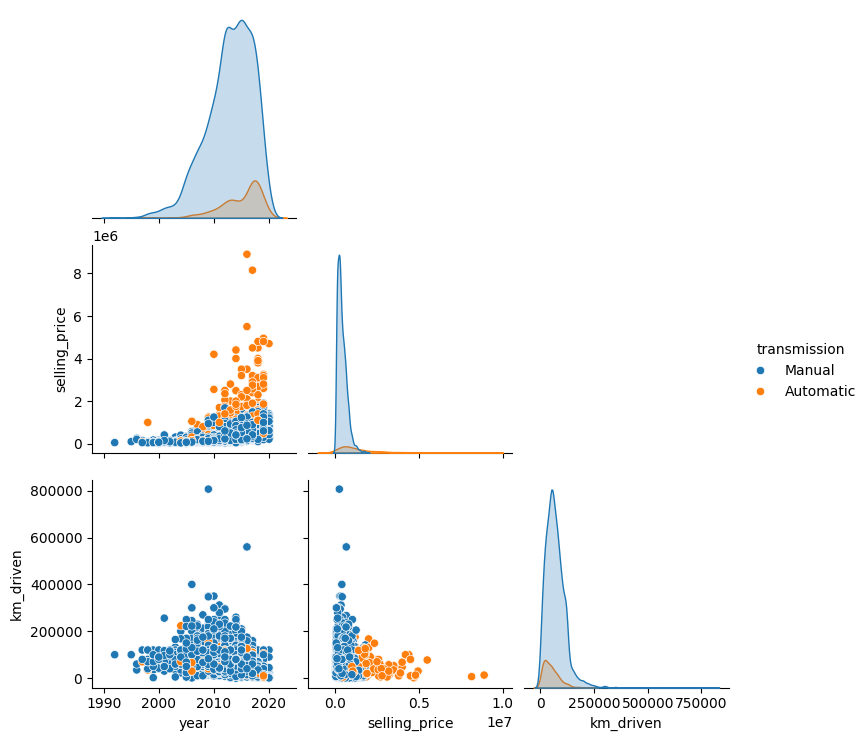

In [75]:
sns.pairplot(df, corner=True , hue = 'transmission')
plt.show()

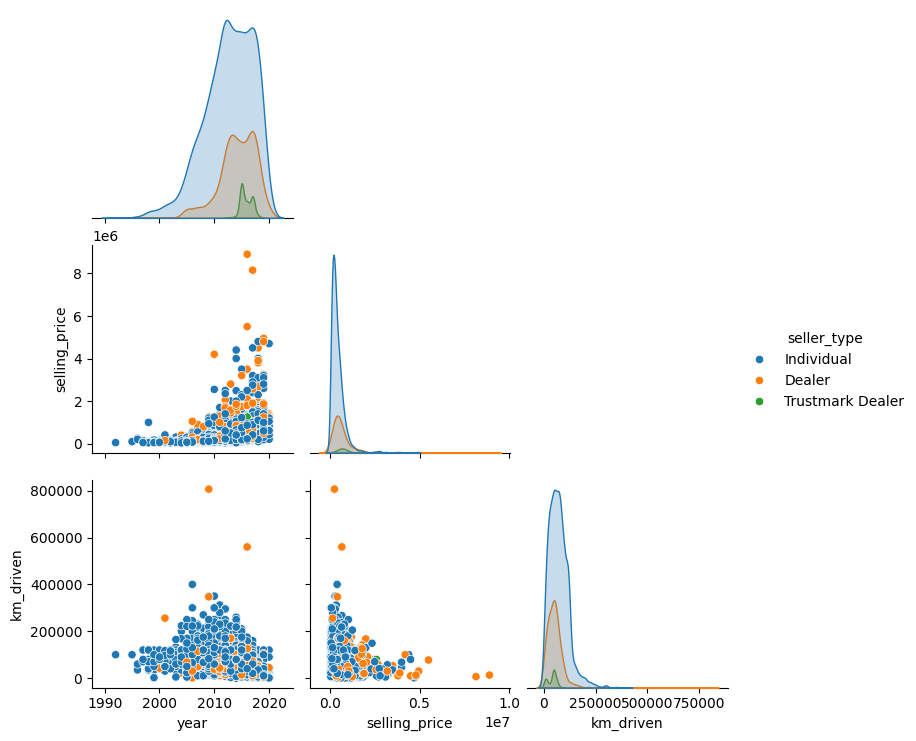

In [76]:
sns.pairplot(df, corner=True , hue = 'seller_type')
plt.show()

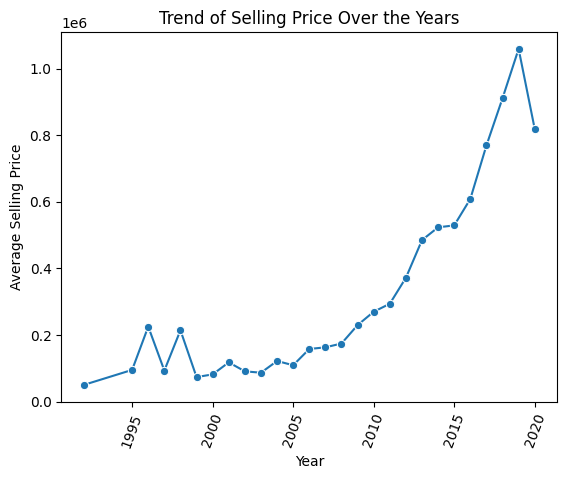

In [77]:
sns.lineplot(x="year", y="selling_price", data=df, marker='o',errorbar=None)
plt.xticks(rotation=70)
plt.xlabel("Year")
plt.ylabel("Average Selling Price")
plt.title("Trend of Selling Price Over the Years")
plt.show()

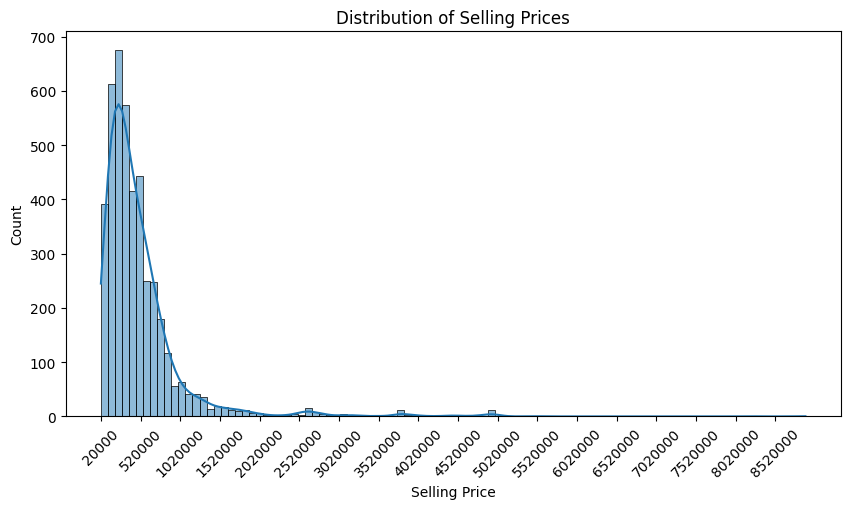

In [78]:
plt.figure(figsize=(10, 5))  # Set figure size
sns.histplot(df['selling_price'], bins=100, kde=True)

plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.title("Distribution of Selling Prices")

plt.xticks(rotation=45)  # Rotate x-axis labels
plt.ticklabel_format(style='plain', axis='x')  # Ensures actual values show, not scientific notation

# Manually setting x-axis ticks every 5k
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
plt.xticks(np.arange(min_price, max_price, 500000)) 
plt.show()


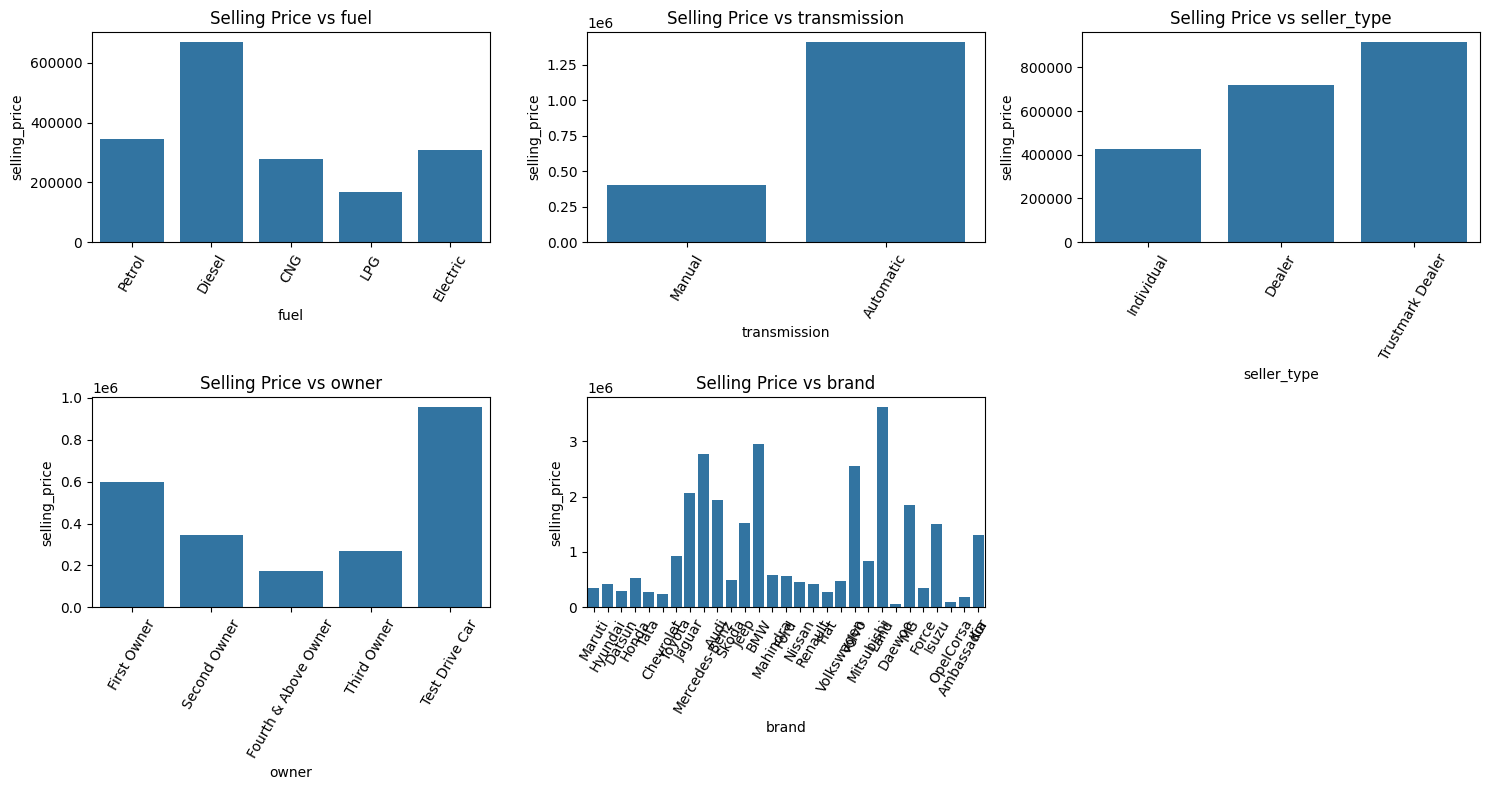

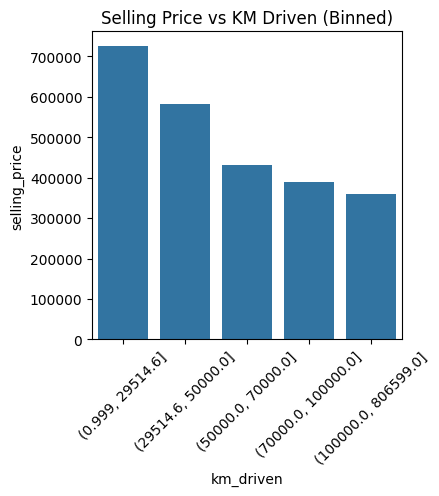

In [79]:
categorical_columns = ['fuel', 'transmission', 'seller_type', 'owner', 'brand']
plt.figure(figsize=(15, 8))

# barplots for categorical features
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)  # Arrange subplots in 2 rows, 3 columns
    sns.barplot(x=column, y='selling_price', data=df, estimator=lambda x: x.mean(), errorbar=None)
    plt.xticks(rotation=60)
    plt.title(f'Selling Price vs {column}')

plt.tight_layout()
plt.show()

# Barplot for km_driven (binned for better readability)
plt.figure(figsize=(4,4))
sns.barplot(x=pd.qcut(df['km_driven'], q=5), y=df['selling_price'], errorbar=None)
plt.xticks(rotation=45)
plt.title('Selling Price vs KM Driven (Binned)')
plt.show()


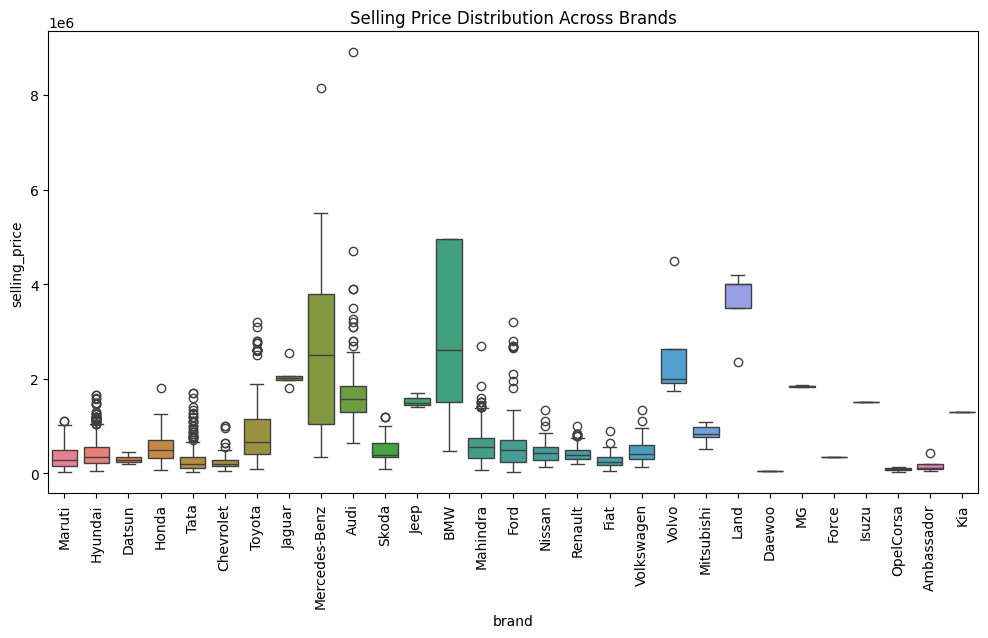

In [80]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='selling_price', data=df, hue='brand')
plt.xticks(rotation=90)
plt.title('Selling Price Distribution Across Brands')
plt.show()


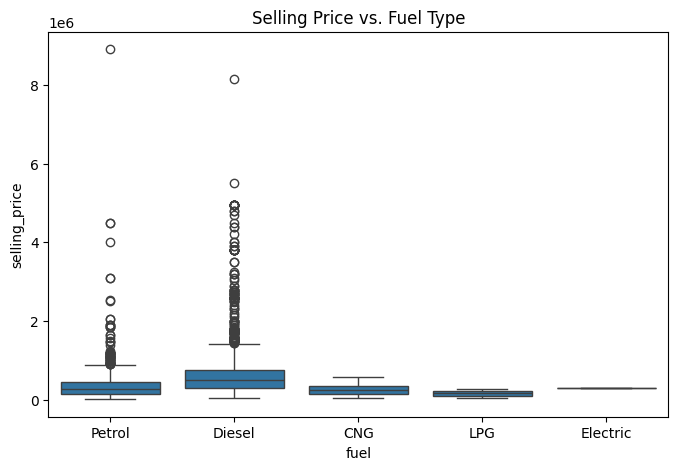

In [81]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Selling Price vs. Fuel Type')
plt.show()


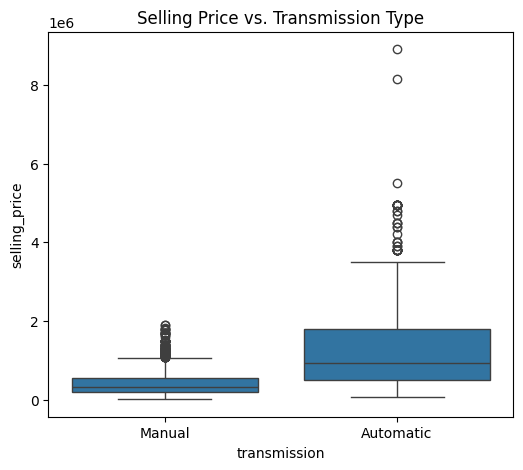

In [82]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='transmission', y='selling_price', data=df)
plt.title('Selling Price vs. Transmission Type')
plt.show()


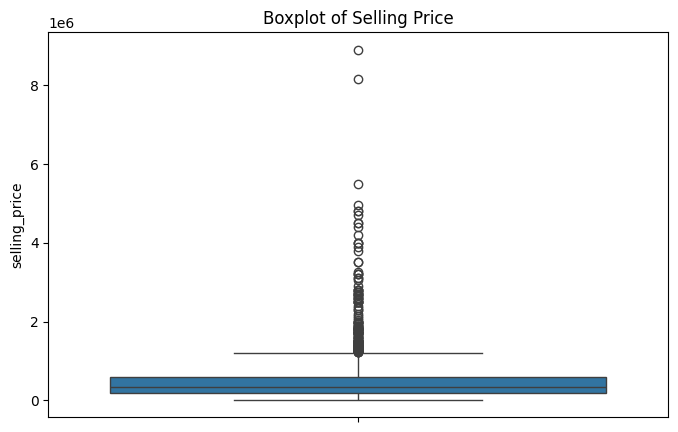

In [83]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=Df['selling_price'])
plt.title('Boxplot of Selling Price')
plt.show()

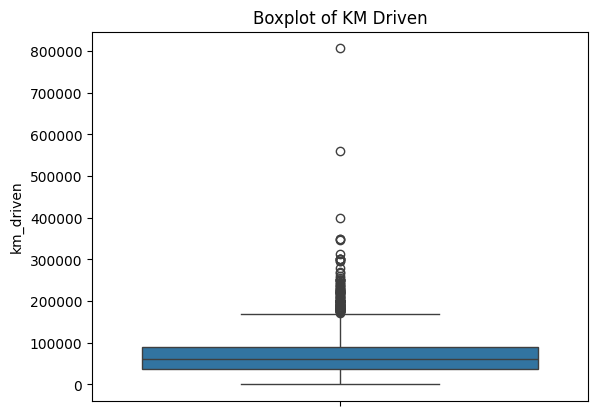

In [84]:
sns.boxplot(y=Df['km_driven'])
plt.title('Boxplot of KM Driven')
plt.show()


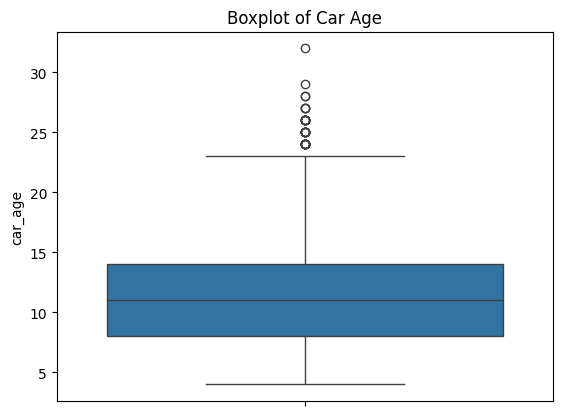

In [85]:
sns.boxplot(y=Df['car_age'])
plt.title('Boxplot of Car Age')
plt.show()


### Outliers observed, so removing them

In [86]:
def remove_outliers(df, column):
    Q1 = Df[column].quantile(0.25)
    Q3 = Df[column].quantile(0.75)
    IQR = Q3 - Q1
    return Df[(Df[column] >= Q1 - 1.5 * IQR) & (Df[column] <= Q3 + 1.5 * IQR)]

# Removing outliers from relevant numerical columns
for col in ['selling_price', 'km_driven', 'car_age']:
    Df = remove_outliers(Df, col)

# Predictive model

In [87]:
X = Df.drop(columns=['selling_price'])
y = Df['selling_price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting Data into Training (80%) and Testing (20%) Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



#### Random Forest Regression

In [88]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest R² Score: {r2_rf:.4f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")



Random Forest R² Score: 0.5764
Random Forest RMSE: 168580.81


#### Linear Regression

In [89]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression R² Score: {r2_lr:.4f}")
print(f"Linear Regression RMSE: {rmse_lr:.2f}")



Linear Regression R² Score: 0.5341
Linear Regression RMSE: 176793.69


####  Visualization 

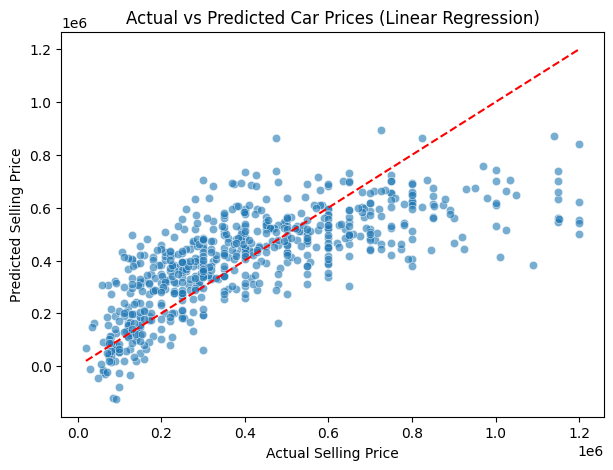

In [90]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed') 
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices (Linear Regression)")
plt.show()

## _By : **Diya Tomar**_